# Loading a line art file

In [3]:
import xml.etree.ElementTree as ET

class VPlotterSVG:

    def __init__(self, file_xml = 'svg.xml'):
        tree = ET.parse(file_xml)
        self._root = tree.getroot()

        for child in self._root:
            print child.tag, child.attrib

    def get_c(self):
        try:
            self._root.find('c')
        except Exception:
            return -1

    def get_path(self):
        path = []
        try:
            for line in self._root.findall('line'):
                path.append([line.x1, line.y1], [line.x2, line.y2])
        except Exception:
            path = []

        return path

In [16]:
shelton = VPlotterSVG('img/shelton6.svg')

{http://www.w3.org/2000/svg}defs {'id': 'defs2987'}
{http://www.w3.org/2000/svg}metadata {'id': 'metadata2990'}
{http://www.w3.org/2000/svg}g {'id': 'layer1'}


In [5]:
path = shelton.get_path()

In [15]:
shelton._root.find('c')

In [26]:
g = shelton._root[2]

In [30]:
g_id = g[0]

In [34]:
g_id_tranform = g_id[0]

In [36]:
g_id_tranform.keys()

['style', 'id', 'd']

In [2]:
from xml.dom import minidom

doc = minidom.parse('img/shelton6.svg')  # parseString also exists
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

In [3]:
paths = path_strings[0].split(' ')[1:]

In [4]:
paths = [[float(x) for x in path.split(',')] for path in paths]

In [5]:
#paths

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

[-5, 5, -5, 5]

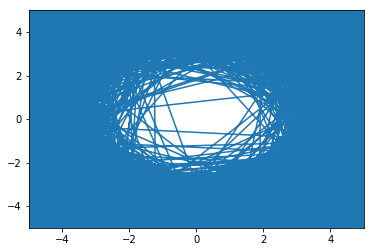

In [10]:
x,y = zip(*paths[1:])
plt.plot(x, y)
plt.axis([-5, 5, -5, 5])

In [68]:
paths[:10]

[[1725.6891, 317.6045],
 [4.3823, 3.3545],
 [1.9818, 4.79082],
 [-0.8397, 5.53258],
 [-7.5492, 1.7223],
 [0.7078, -7.24115],
 [-5.4103, -6.20782],
 [-2.8552, 6.51721],
 [-1.4577, 6.39126],
 [0.8904, 7.28684]]